# AGGRESSION ANALYSIS EDA

### By Dwayne Negron

### A predictive model on the chances of Theft occuring in the Orlando, FL area by utilizing state-reported city police data. 

---

In [1]:
#Loading our tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression

### Exploration of the Dataset

Let us take a look at the Orlando Police Data set. 

In [2]:
df = pd.read_csv("OPD_Crimes.csv", parse_dates = ['Case Date Time'])
df.head()

Case Number      Case Date Time                      Case Location  \
0  2010-00800219 2010-01-28 12:47:00  4100 Block of N ORANGE BLOSSOM TL   
1  2010-00800220 2010-01-28 12:54:00  4100 Block of N ORANGE BLOSSOM TL   
2  2010-00800221 2010-01-28 13:02:00  4100 Block of N ORANGE BLOSSOM TL   
3  2010-00178297 2010-04-16 12:50:00  4000 Block of N ORANGE BLOSSOM TL   
4  2010-00193916 2010-04-25 18:41:00      4800 Block of PHEASANT RUN DR   

  Case Offense Location Type Case Offense Category  Case Offense Type  \
0          Construction Site                 Theft  All other larceny   
1             Industrial/Mfg                 Theft  All other larceny   
2             Industrial/Mfg                 Theft  All other larceny   
3          Bus/Rail Terminal               Robbery            Robbery   
4           Residence/Single               Assault     Simple assault   

  Case Offense Charge Type Case Disposition    Status Location  
0                Committed           Closed  Unmapped      NaN  
1                Committed           Closed  Unmapped      NaN  
2                Committed           Closed  Unmapped      NaN  
3                Committed           Closed  Unmapped      NaN  
4                Committed           Arrest  Unmapped      NaN

In [3]:
#What are our features? 
for column in df:
    print(column)

Case Number
Case Date Time
Case Location
Case Offense Location Type
Case Offense Category
Case Offense Type
Case Offense Charge Type
Case Disposition
Status
Location


In [4]:
#Let us add some Date Time features

df['Date'] = df['Case Date Time'].dt.date
df['Year'] = df['Case Date Time'].dt.year
df['Month'] = df['Case Date Time'].dt.month
df['Day'] = df['Case Date Time'].dt.dayofweek
df['DayLinear']= df['Case Date Time'].dt.day
df['Hour'] = df['Case Date Time'].dt.hour

### Missing Values? 

We expect a few because of a note left by the Dataset provider. 
We eliminate these missing values because we know from the data provider that the missing values were before the policy changed to track location. 

In [5]:
print("How many Missing Values are found in the Case Number column? ", df.isna().sum())

How many Missing Values are found in the Case Number column?  Case Number                      0
Case Date Time                   2
Case Location                    0
Case Offense Location Type       0
Case Offense Category            0
Case Offense Type                0
Case Offense Charge Type         0
Case Disposition                 0
Status                           0
Location                      8719
Date                             2
Year                             2
Month                            2
Day                              2
DayLinear                        2
Hour                             2
dtype: int64


In [6]:
df = df.dropna()
print("How many Missing Values are found in the Case Number column? ", df.isnull().sum())

How many Missing Values are found in the Case Number column?  Case Number                   0
Case Date Time                0
Case Location                 0
Case Offense Location Type    0
Case Offense Category         0
Case Offense Type             0
Case Offense Charge Type      0
Case Disposition              0
Status                        0
Location                      0
Date                          0
Year                          0
Month                         0
Day                           0
DayLinear                     0
Hour                          0
dtype: int64


### Feature Descriptions and Analysis

For our Features we know the following: 
- "Theft" was the majority of reported crime. 
- Of Theft crimes the majority were classified as "All other larceny"
- Apartment/Condo's tended to be the place of the most crime. 

Let see what else we can find!

In [7]:
# Describing the Features in question
print(df['Case Offense Location Type'].describe(),"\n")
print(df['Case Offense Category'].describe(),"\n")
print(df['Case Offense Type'].describe(),"\n")
print(df['Case Offense Charge Type'].describe(),"\n")
print(df['Case Disposition'].describe(),"\n")
print(df['Status'].describe(),"\n")
print(df['Location'].describe(),"\n")

count              212979
unique                 77
top       Apartment/Condo
freq                38211
Name: Case Offense Location Type, dtype: object 

count     212979
unique        12
top        Theft
freq      107859
Name: Case Offense Category, dtype: object 

count                212979
unique                   24
top       All other larceny
freq                  54371
Name: Case Offense Type, dtype: object 

count        212979
unique            2
top       Committed
freq         201041
Name: Case Offense Charge Type, dtype: object 

count     212979
unique         4
top       Closed
freq      151949
Name: Case Disposition, dtype: object 

count     212979
unique         1
top       Mapped
freq      212979
Name: Status, dtype: object 

count                          212979
unique                          17470
top       (28.43180352, -81.30852827)
freq                             4736
Name: Location, dtype: object 



In [8]:
# What are the Offense Categories and How Many?
df_CategorySum = df.groupby("Case Offense Category").count().sort_values(by="Case Offense Type", ascending=False)
print(df_CategorySum['Case Number'],"\n\n")
df_OffenseSum = df.groupby("Case Offense Type").count().sort_values(by="Case Offense Category", ascending=False)
print(df_OffenseSum['Case Number'])

Case Offense Category
Theft            107859
Burglary          28085
Assault           23552
Narcotics         22228
Fraud             13955
Vehicle Theft     10826
Robbery            5866
Arson               260
Homicide            184
Kidnapping          108
Embezzlement         55
Bribery               1
Name: Case Number, dtype: int64 


Case Offense Type
All other larceny                                    54371
Burglary/breaking and entering                       28085
Theft from motor vehicle except parts/accessories    25603
Shoplifting                                          22435
Drugs/narcotics                                      20126
Simple assault                                       19111
Motor vehicle theft                                  10826
False pretense/swindle/confidence game                9984
Robbery                                               5866
Aggravated assault                                    4441
Credit card/atm fraud                          

### Barplot of Total Crimes vs Year / Month Day

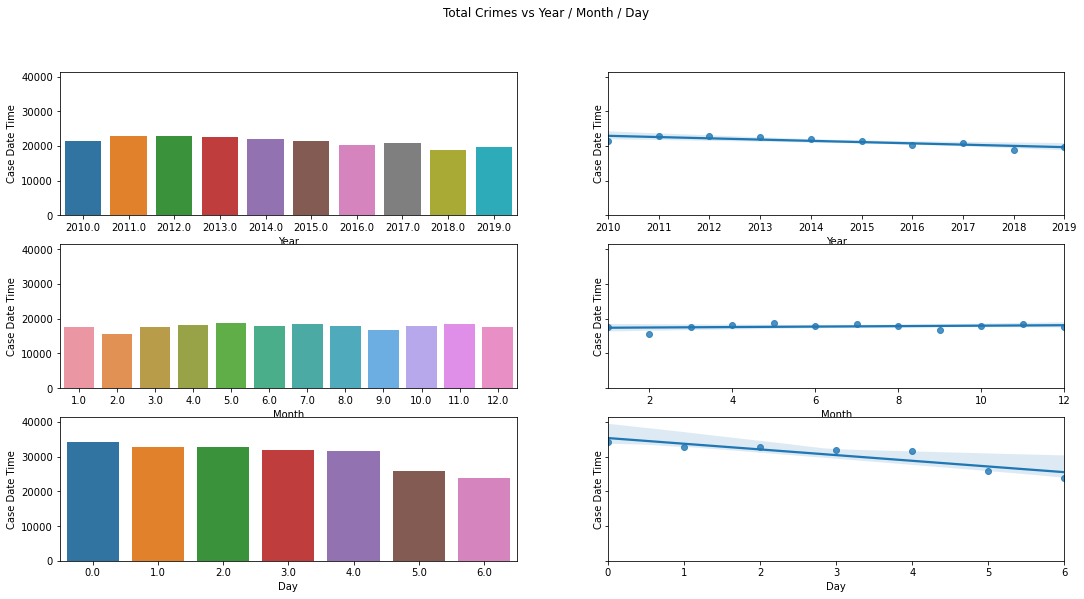

In [9]:
df_year = df[['Year', 'Case Date Time']].groupby('Year').count().reset_index()
df_date = df[['Date', 'Case Date Time']].groupby('Date').count().reset_index()
df_month = df[['Month', 'Case Date Time']].groupby('Month').count().reset_index()
df_day = df[['Day', 'Case Date Time']].groupby('Day').count().reset_index()

fig, ax = plt.subplots(3,2, sharey=True, figsize = (18,9))

fig.suptitle('Total Crimes vs Year / Month / Day')

gY = sns.barplot(x='Year', y='Case Date Time', data=df_year, ax=ax[0,0])
gM = sns.barplot(x='Month', y='Case Date Time', data=df_month, ax=ax[1,0])
gD = sns.barplot(x='Day', y='Case Date Time', data=df_day, ax=ax[2,0])
gYr = sns.regplot(x='Year', y='Case Date Time', data=df_year, ax=ax[0,1])
gMr = sns.regplot(x='Month', y='Case Date Time', data=df_month, ax=ax[1,1])
gDr = sns.regplot(x='Day', y='Case Date Time', data=df_day, ax=ax[2,1])

Rudimentary EDA shows some non-major trends in crime volume when viewed in regard to the Year / Month / Day features. 

### Stockmarket-style Crime Volume per Day

[Text(0.5, 0, '2010-2019')]

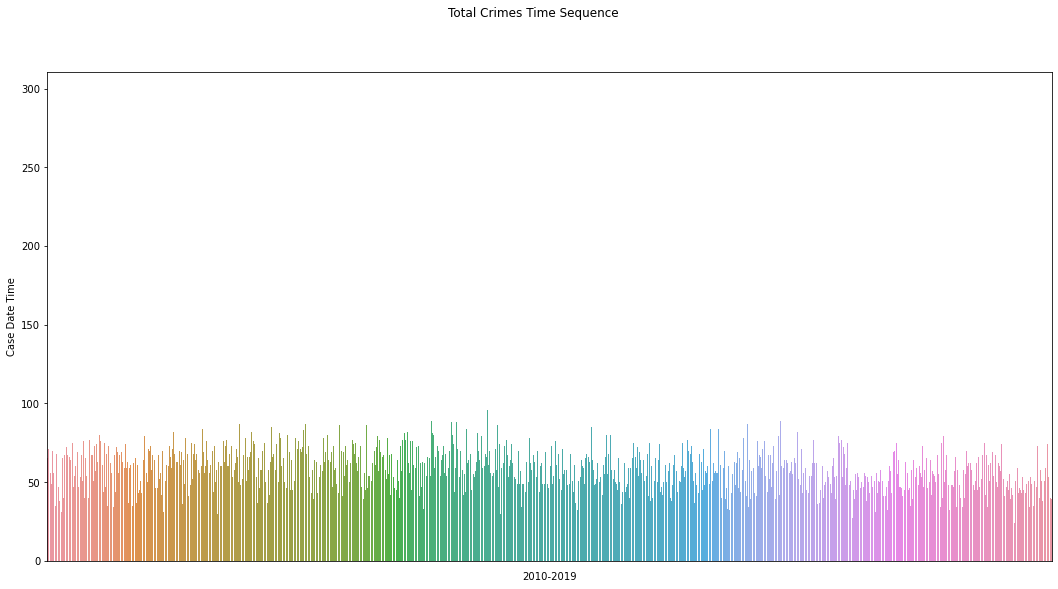

In [10]:
# Graphed plot of Crime volume versus all days in attempt to create a stock market style visualization of crime sum.
fig, ax= plt.subplots(figsize = (18,9))
fig.suptitle('Total Crimes Time Sequence')
g = sns.barplot(x='Date', y='Case Date Time', data=df_date)
g.tick_params(bottom=False)
g.set(xticklabels=[])
g.set(xlabel = '2010-2019')

### Introspective on Theft Volume Crime Types

Underneath you will find a logistic regression comparing different date time features against the Volume of Theft crimes and organized by Theft Type. 

From this we could deduce that a majority of Larceny Theft Crimes occured toward the beginning of the week (Monday) around lunch time (12:00)! 

[Text(0, 0.5, 'Theft Total')]

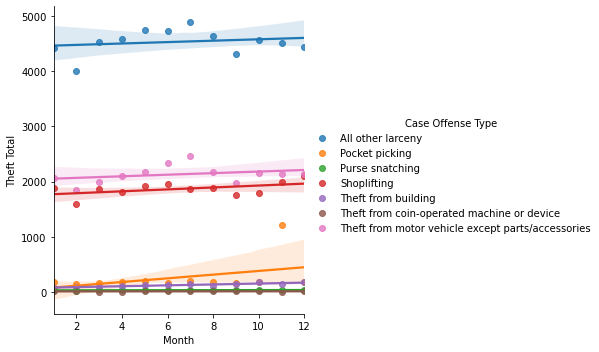

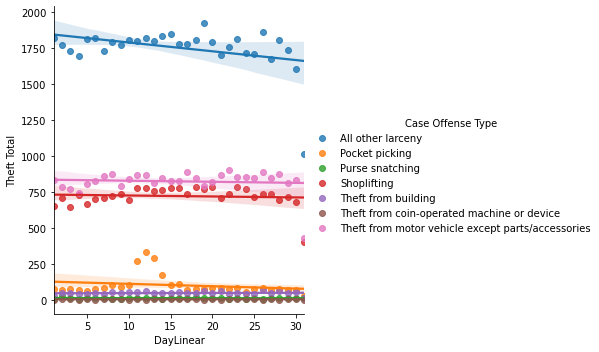

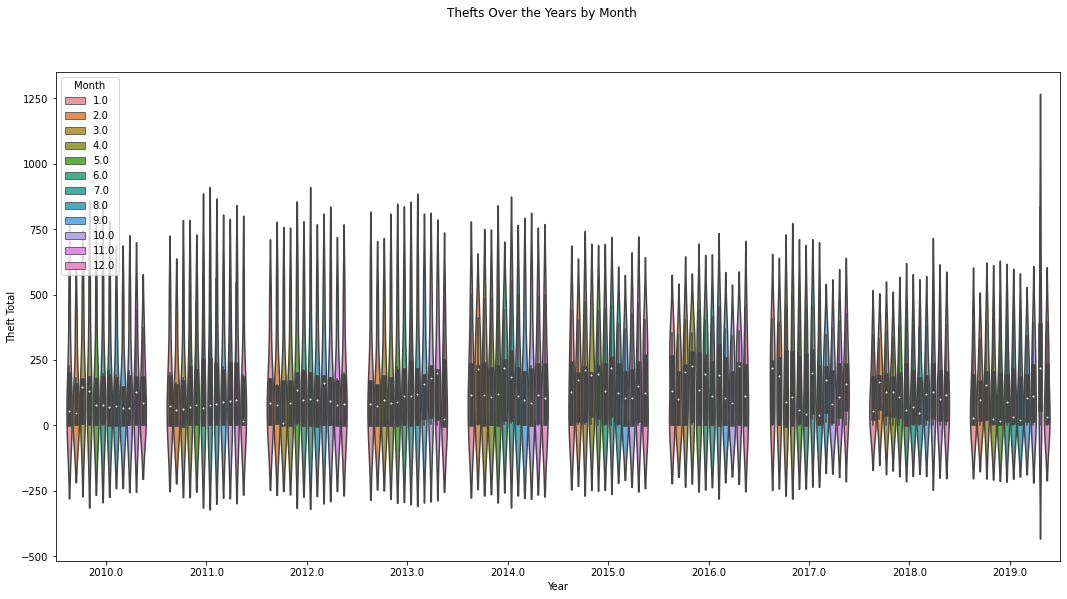

In [11]:
dfT = df[df['Case Offense Category'] == 'Theft']
df_year_TType = dfT[['Year', 'Case Offense Type', 'Case Date Time']].groupby(['Year', 'Case Offense Type']).count().reset_index()
df_month_TType = dfT[['Month', 'Case Offense Type', 'Case Date Time']].groupby(['Month', 'Case Offense Type']).count().reset_index()
df_day_TType = dfT[['Day', 'Case Offense Type', 'Case Date Time']].groupby(['Day', 'Case Offense Type']).count().reset_index()
df_day_daily_TType = dfT[['DayLinear', 'Case Offense Type', 'Case Date Time']].groupby(['DayLinear', 'Case Offense Type']).count().reset_index()
df_hour_TType = dfT[['Hour', 'Case Offense Type', 'Case Date Time']].groupby(['Hour', 'Case Offense Type']).count().reset_index()

gY = sns.lmplot(x='Year', y='Case Date Time', hue='Case Offense Type', data=df_year_TType)
gM = sns.lmplot(x='Month', y='Case Date Time', hue='Case Offense Type', data=df_month_TType)
gD = sns.lmplot(x='Day', y='Case Date Time', hue='Case Offense Type', data=df_day_TType)
gDl = sns.lmplot(x='DayLinear', y='Case Date Time', hue='Case Offense Type', data=df_day_daily_TType)
gH = sns.lmplot(x='Hour', y='Case Date Time', hue='Case Offense Type', data=df_hour_TType)

# An attempt to plot localized groupings of Theft Types binned by month and plotted via year.
df_yrmo_TType = dfT[['Year', 'Month', 'Case Offense Type', 'Case Date Time']].groupby(['Year', 'Month', 'Case Offense Type']).count().reset_index()
fig, ax = plt.subplots(figsize = (18,9))
g = sns.violinplot(x="Year", y="Case Date Time", hue='Month', data=df_yrmo_TType)
fig.suptitle('Thefts Over the Years by Month')

# Y axis Label Correction
gY.set(ylabel='Theft Total')
gM.set(ylabel='Theft Total')
gD.set(ylabel='Theft Total')
gDl.set(ylabel='Theft Total')
gH.set(ylabel='Theft Total')
g.set(ylabel='Theft Total')

### Additional Analysis of Theft Larcenies 

We saw some interesting trends with Theft Larcenies and wanted to have a clearer look without the other Type features in the plot. 

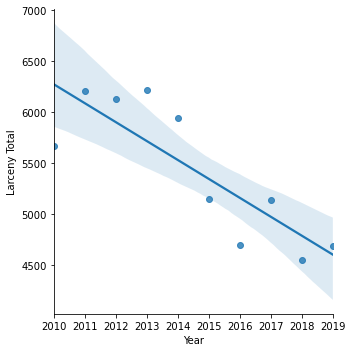

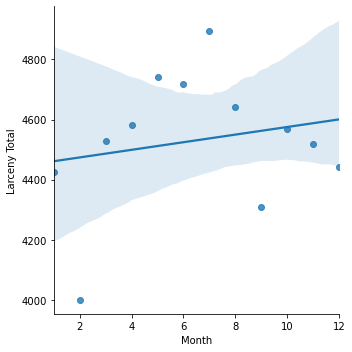

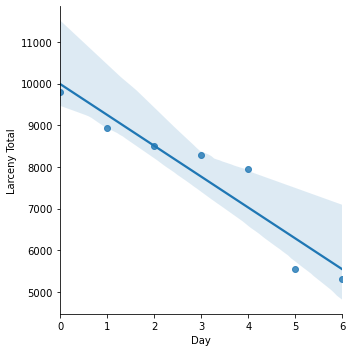

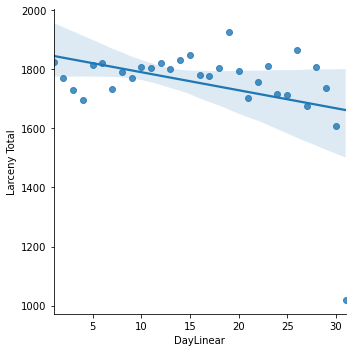

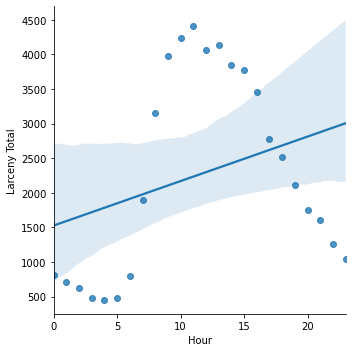

In [17]:
dfT = df[df['Case Offense Category'] == 'Theft']
dfTlarc = dfT[dfT['Case Offense Type'] == 'All other larceny']

df_d_hour_Tlarc = dfTlarc[['Hour', 'Case Number']].groupby(['Hour']).count().reset_index()
df_d_month_Tlarc = dfTlarc[['Month', 'Case Number']].groupby(['Month']).count().reset_index()
df_d_year_Tlarc = dfTlarc[['Year', 'Case Number']].groupby(['Year']).count().reset_index()
df_d_day_Tlarc = dfTlarc[['Day', 'Case Number']].groupby(['Day']).count().reset_index()
df_d_daylinear_Tlarc = dfTlarc[['DayLinear', 'Case Number']].groupby(['DayLinear']).count().reset_index()

gY = sns.lmplot(x='Year', y='Case Number', data=df_d_year_Tlarc)
gM = sns.lmplot(x='Month', y='Case Number', data=df_d_month_Tlarc)
gD = sns.lmplot(x='Day', y='Case Number', data=df_d_day_Tlarc)
gDl = sns.lmplot(x='DayLinear', y='Case Number', data=df_d_daylinear_Tlarc)
gH = sns.lmplot(x='Hour', y='Case Number', data=df_d_hour_Tlarc)

gY.set(ylabel='Larceny Total')
gM.set(ylabel='Larceny Total')
gD.set(ylabel='Larceny Total')
gDl.set(ylabel='Larceny Total')
gH.set(ylabel='Larceny Total')


### Additional Analysis

We were reccomended to repeat the following analysis using the location of the mean volume to provide a different perspective on the same data. Doing so created a better fit for some time variables with the logistic regression. 

/home/dn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/dn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

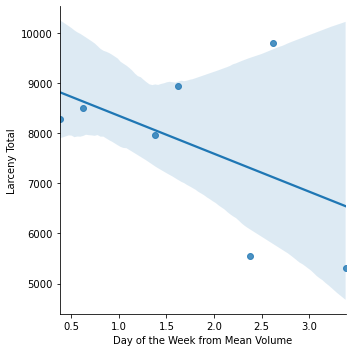

In [18]:
dfT = df[df['Case Offense Category'] == 'Theft']
dfTlarc = dfT[dfT['Case Offense Type'] == 'All other larceny']

dfTlarc['Year Mean'] = dfTlarc['Year'].mean()
dfTlarc['Month Mean'] = dfTlarc['Month'].mean()
dfTlarc['Day Mean'] = dfTlarc['Day'].mean()
dfTlarc['DayLinear Mean'] = dfTlarc['DayLinear'].mean()
dfTlarc['Hour Mean'] = dfTlarc['Hour'].mean()
dfTlarc['d Year'] = abs(dfTlarc['Year'] - dfTlarc['Year Mean'])
dfTlarc['d Month'] = abs(dfTlarc['Month'] - dfTlarc['Month Mean'])
dfTlarc['d Day'] = abs(dfTlarc['Day'] - dfTlarc['Day Mean'])
dfTlarc['d DayLinear'] = abs(dfTlarc['DayLinear'] - dfTlarc['DayLinear Mean'])
dfTlarc['d Hour'] = abs(dfTlarc['Hour'] - dfTlarc['Hour Mean'])

df_d_hour_Tlarc = dfTlarc[['d Hour', 'Case Number']].groupby(['d Hour']).count().reset_index()
df_d_month_Tlarc = dfTlarc[['d Month', 'Case Number']].groupby(['d Month']).count().reset_index()
df_d_year_Tlarc = dfTlarc[['d Year', 'Case Number']].groupby(['d Year']).count().reset_index()
df_d_day_Tlarc = dfTlarc[['d Day', 'Case Number']].groupby(['d Day']).count().reset_index()
df_d_daylinear_Tlarc = dfTlarc[['d DayLinear', 'Case Number']].groupby(['d DayLinear']).count().reset_index()

gY = sns.lmplot(x='d Year', y='Case Number', data=df_d_year_Tlarc)
gM = sns.lmplot(x='d Month', y='Case Number', data=df_d_month_Tlarc)
gD = sns.lmplot(x='d Day', y='Case Number', data=df_d_day_Tlarc)
gDl = sns.lmplot(x='d DayLinear', y='Case Number', data=df_d_daylinear_Tlarc)
gH = sns.lmplot(x='d Hour', y='Case Number', data=df_d_hour_Tlarc)

gY.set(ylabel='Larceny Total', xlabel='Years from Mean Volume')
gM.set(ylabel='Larceny Total', xlabel='Months from Mean Volume')
gD.set(ylabel='Larceny Total', xlabel = 'Day of the Week from Mean Volume')
gDl.set(ylabel='Larceny Total', xlabel='Days from Mean Volume')
gH.set(ylabel='Larceny Total', xlabel='Hours from Mean Volume')

### Projected Volume of Theft Crimes Compared by Month

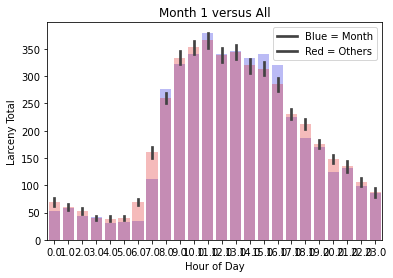

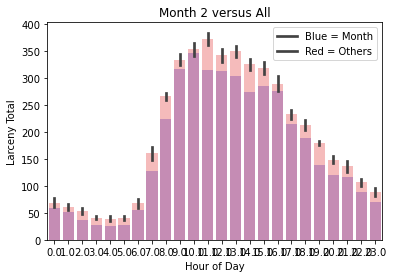

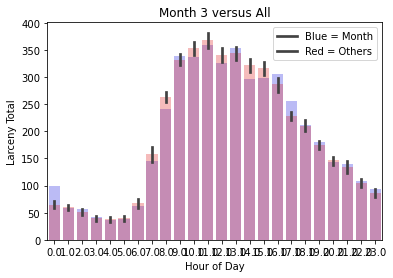

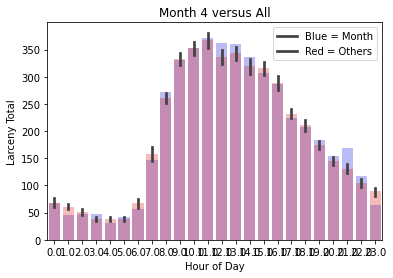

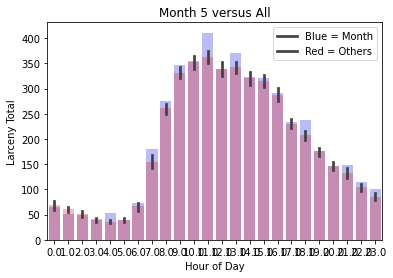

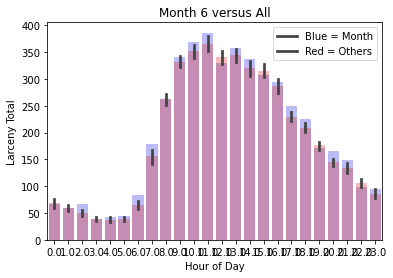

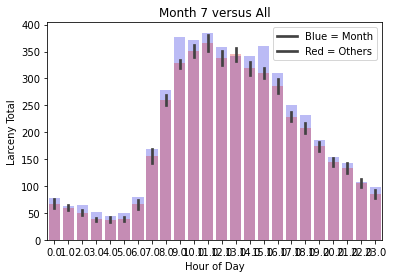

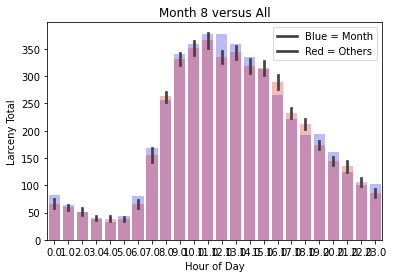

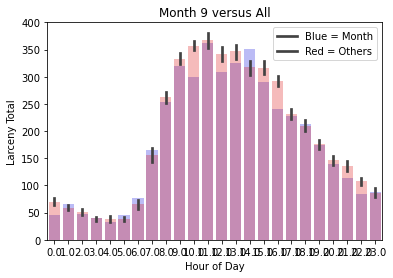

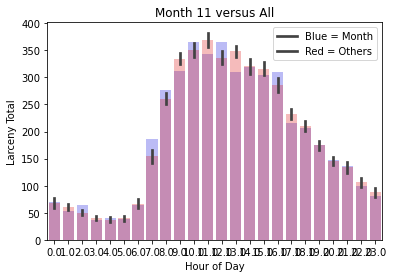

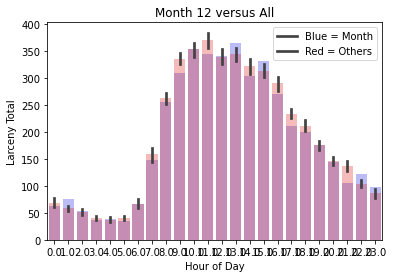

In [14]:
dfT = df[df['Case Offense Category'] == 'Theft']
dfTlarc = dfT[dfT['Case Offense Type'] == 'All other larceny']
df_hour_Tlarc = dfTlarc[['Hour','Month','Case Number']].groupby(['Hour','Month']).count().reset_index()

for i in range(12):
    df_hour_Tlarci = df_hour_Tlarc[df_hour_Tlarc['Month'] == (i+1)]
    df_hour_TlarcO = df_hour_Tlarc[df_hour_Tlarc['Month'] != (i+1)]
    gA = sns.barplot(x="Hour", y="Case Number", data=df_hour_Tlarci, alpha=0.3, color='blue')
    gB = sns.barplot(x="Hour", y="Case Number", data=df_hour_TlarcO, alpha=0.3, color='red')
    gA.set(ylabel='Larceny Total')
    gA.set(xlabel='Hour of Day')
    plt.title('Month %i versus All' %(i+1))
    plt.legend(labels=['Blue = Month', 'Red = Others'])
    plt.show()

/home/dn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

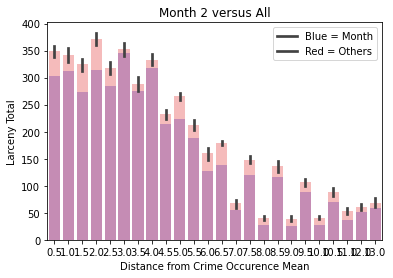

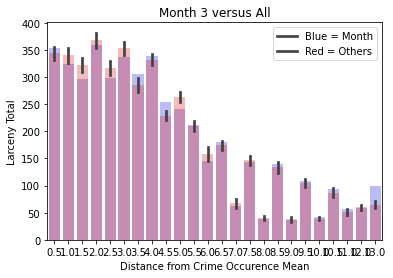

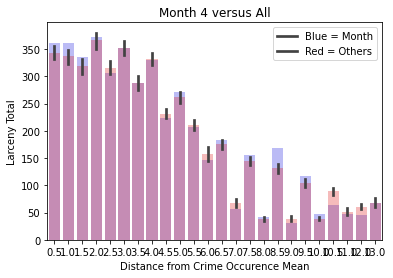

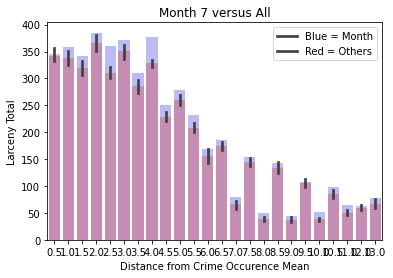

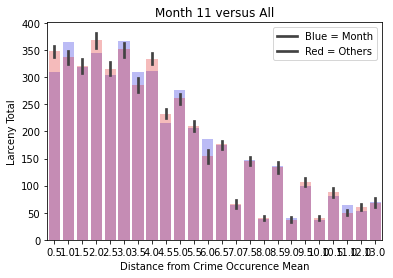

In [15]:
dfT = df[df['Case Offense Category'] == 'Theft']
dfTlarc = dfT[dfT['Case Offense Type'] == 'All other larceny']
dfTlarc['Hour Mean'] = dfTlarc['Hour'].mean()
dfTlarc['d Hour'] = abs(dfTlarc['Hour'] - dfTlarc['Hour Mean'])
dfTlarc['d Hour'] = round(((dfTlarc['d Hour'] * 2)+.5))/2
df_hour_Tlarc = dfTlarc[['d Hour', 'Month', 'Case Number']].groupby(['d Hour', 'Month']).count().reset_index()

for i in range(12):
    df_hour_Tlarci = df_hour_Tlarc[df_hour_Tlarc['Month'] == (i + 1)]
    df_hour_TlarcO = df_hour_Tlarc[df_hour_Tlarc['Month'] != (i + 1)]
    gA = sns.barplot(x="d Hour", y="Case Number", data=df_hour_Tlarci, alpha=0.3, color='blue')
    gB = sns.barplot(x="d Hour", y="Case Number", data=df_hour_TlarcO, alpha=0.3, color='red')
    gA.set(ylabel='Larceny Total')
    gA.set(xlabel='Distance from Crime Occurence Mean')
    plt.title('Month %i versus All' % (i + 1))
    plt.legend(labels=['Blue = Month', 'Red = Others'])
    plt.show()

### EDA Synopsis

We found that two of our features worked much better with the date time variables [Category & Type] then the others. All features were plotted and logistic regressions performed. For those features which showed no analytic characteristics or were not well suited too the logistic regression they were ommitted from the final EDA report. Leaving the EDA and preparing for ML Initializing we had better understanding that additional features would be needed to combat Seasonality within our dataset introduced by the Date Time variables and that we would have to be cognizant of the dataset weight and attempt to balance it via sampling. 